#### Homework #5. Exploratory Data Analysis
### Author: `<OLEKSANDR> <SEVERHIN>`
### Total time spent on h/w (in minutes): `<1400>`

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from nltk.corpus import stopwords
import plotly.express as px

In [33]:
MERGED_DATA_PATH = "D:\НаУКМА\CSS\data\merged_data"
DIALOGS_MERGED_DATA_PATH = "D:\НаУКМА\CSS\data\merged_data\dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "D:\НаУКМА\CSS\data\merged_data\dialogs_users_all.csv"

In [34]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, low_memory=False)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH, low_memory=False)

#### Merging all data and all users tables into one (still not working)

In [37]:
#df_con = pd.DataFrame()

#i = 0
#for row in range(len(df_meta)):
#    if row == 0:
#        a = df_meta.loc[row]["dialog_id"]
#        df_con.loc[i].append(df_meta.loc[row])
#    if row > 0:
#        b = df_meta.loc[row]["dialog_id"]
#    if a == b :
#        df_con.loc[i]["users"].append(df_meta.loc[row]["users"])
#    if a != b :
#        i = i + 1
#        a = b
#        df_con.loc[i].append(df_meta.loc[row])
        
#display(df_con)        

#a = df
#b = df_meta
#b = b.dropna(axis=1)
#merged = pd.merge(a,b, on = 'dialog_id') #a.merge(b, on='dialog_id')

#merged.to_csv(f"{MERGED_DATA_PATH}/dialogs_data_all_merged.csv", index=False)

##### Upper you have seen how I have tried to merged two csv tables, but with no results :(
#### And under this cell you can see 21 questions I want to answer.
##### This questions are about deeper analysis of my communication with people and in chats or groups. I structurised them into logical oder. Of course, these are not all the questions I could have answered, but these were what I've created and did. I hope you'll like it! 
#### In the end of this page, I will leave a short summary.

### 21 questions I want to explore:

1. My activness in private chats vs groups? 
2. Amount of private chats vs groups?
3. Amount of group chats vs information chats (where I can ONLY READ posts)?  
4. Amount of messages I sent on my birthday vs amount of messages I sent on other days?
5. Stickers I use the most?
6. Stickers my interlocutors use the most?
7. All the stickers I've used?
8. Amount of people who hide their phones vs those whose phones unhidden?
9. Amount of each message types I sent?
10. Amount of each message types I received?
11. Which things I forwarded most? (posts, media files?)
12. The longest video I've sent and the longest audio I've received?
13. The words I used the most?
14. The words people who talk with me use the most?
15. Types of messeges I used (with '?', '!' ot with ' '/'.')?
16. Types of messeges I received (with '?', '!' ot with ' '/'.')?
17. In which season I sent the biggest amount of messages?
18. In which season I received the biggest amount of messages?
19. In which time of the day I sent messages the most?
20. In which time of the day I received messages the most?
21. How has changed my activness in Telegram before the COVID-19 and after?

####  №1. My activness in private chats vs groups? 

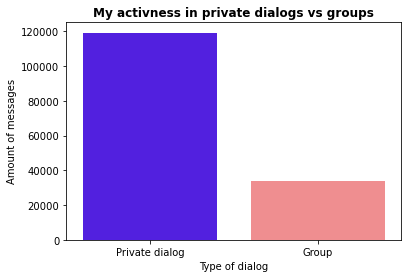

In [204]:
sent_chats = []
sent_groups = []
d = df.loc[df["from_id"] == "PeerUser(user_id=332402450)"]
d_id = d["to_id"]
d_dialog = d["dialog_id"]
my_mes = pd.DataFrame(d_id)
my_id = pd.DataFrame(d_dialog)

#Main operations
for i in range(len(my_mes)):
    if ("PeerUser" in str(my_mes.iloc[i, 0])):   
        sent_chats.append(my_mes.iloc[i, 0])
    if ("PeerChannel" in str(my_mes.iloc[i, 0])):   
        sent_groups.append(my_mes.iloc[i, 0])
        
    else:
        d2 = df_meta.loc[df_meta["dialog_id"] == my_id.iloc[i, 0]]
        if "Private dialog" in str(d2["type"]):
            sent_chats.append(my_mes.iloc[i, 0])
        if "Group" in str(d2["type"]):
            sent_groups.append(my_mes.iloc[i, 0])
    
# Visuals
x = ["Private dialog", "Group"]
y = [len(sent_chats), len(sent_groups)]
sns.barplot(x, y, palette = "gnuplot2")
plt.title('My activness in private dialogs vs groups', fontsize=12, fontweight='bold')
plt.xlabel('Type of dialog')
plt.ylabel('Amount of messages') 
plt.show()

#### №2. Amount of private chats vs groups?

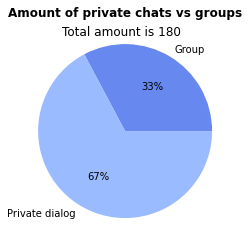

In [46]:
unique_gr = []
unique_ch = []

#Main operations
for i in range(len(df_meta)) :
    if df_meta.loc[i]["type"] == "Group" : 
        if df_meta.loc[i]["dialog_id"] not in unique_gr :
            unique_gr.append(df_meta.loc[i]["dialog_id"])
    if df_meta.loc[i]["type"] == "Private dialog" :
        if df_meta.loc[i]["dialog_id"] not in unique_ch :
            unique_ch.append(df_meta.loc[i]["dialog_id"])        

# Visuals
x = df_meta["type"].unique()
y = [len(unique_gr), len(unique_ch)]
total = len(unique_gr) + len(unique_ch)
string = 'Total amount is ' + str(total)
colors = sns.color_palette('coolwarm')
plt.pie(y, labels = x, colors = colors, autopct='%.0f%%')
plt.title('Amount of private chats vs groups', fontsize=12, fontweight='bold')
plt.text(-0.73, 1.1, string, fontsize = 12)
plt.show()

#### №3. Amount of group chats vs information chats (where I can ONLY READ posts)?  


Amount of chatting groups: 59
Amount of info groups: 0


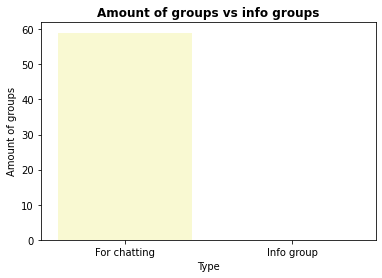

In [36]:
unique_gr = []
chat = []
info = []

#Main operations
# getting unique groups
for i in range(len(df_meta)) :
    if df_meta.loc[i]["type"] == "Group" : 
        if df_meta.loc[i]["dialog_id"] not in unique_gr :
            unique_gr.append(df_meta.loc[i]["dialog_id"])
            
# counting messages I wrote (I know for sure that I wrote at least one message in all chatting groups)
for i in range(len(unique_gr)) :
    h = 0
    for a in range(len(df)) :
        if df.loc[a]["from_id"] == "PeerUser(user_id=332402450)" :
            chat.append(unique_gr[i])
            h += 1
            break
            
    if h == 0 :
        info.append(unique_gr[i])

print("Amount of chatting groups: " + str(len(chat)))
print("Amount of info groups: " + str(len(info)))

# Visuals
x = ["For chatting", "Info group"]
y = [len(chat), len(info)]
sns.barplot(x=x, y=y, palette = "Pastel1_r")
plt.title("Amount of groups vs info groups", fontsize=12, fontweight='bold')
plt.xlabel('Type')
plt.ylabel('Amount of groups') 
plt.show()

#### №4. Amount of messages I sent on my birthday vs amount of messages I sent on other days (on May)?

Amount on my bd: 141
Amount on another days: 4902


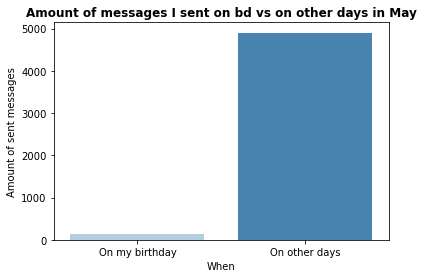

In [25]:
#Main operations
df_birthday = df[ (df["date"].str.contains("2021-05-11")) & (df["from_id"] == "PeerUser(user_id=332402450)") ]
df_sent = df[(df["from_id"] == "PeerUser(user_id=332402450)") & (df["date"].str.contains("2021-05"))]
df_not_bd = len(df_sent) - len(df_birthday)

print("Amount on my bd: " + str(len(df_birthday)))
print("Amount on another days: " + str(df_not_bd))

# Visuals
x = ["On my birthday", "On other days"]
y = [len(df_birthday), df_not_bd]
sns.barplot(x=x, y=y, palette = "Blues")
plt.title('Amount of messages I sent on bd vs on other days in May', fontsize=12, fontweight='bold')
plt.xlabel('When')
plt.ylabel('Amount of sent messages') 
plt.show()

#### №5. Stickers I use the most?

In [20]:
from collections import Counter
text = df[(df["type"]=="sticker") & (df["from_id"] == "PeerUser(user_id=332402450)")].dropna(how='all')
comm_word = text[['message','dialog_id']]

#Main operations
a = comm_word.applymap(str)
d = Counter(" ".join(a["message"]).lower().split())
res = pd.DataFrame.from_dict(d, orient='index').reset_index()
res.columns.values[1] = 'count'
res = res.sort_values(by='count',ascending=False)
res = res.head(10)

#Visuals
px.histogram(data_frame = res, x = 'count', y = 'index', title="Top 10 stickers I used")

#### №6. Stickers my interlocutors used the most?

In [19]:
from collections import Counter
text = df[(df["type"]=="sticker") & (df["to_id"] == "332402450")].dropna(how='all')
comm_word = text[['message','dialog_id']]

#Main operations
a = comm_word.applymap(str)
d = Counter(" ".join(a["message"]).lower().split())
res = pd.DataFrame.from_dict(d, orient='index').reset_index()
res.columns.values[1] = 'count'
res = res.sort_values(by='count',ascending=False)
res = res.drop(6)
res = res.head(10)

#Visuals
px.histogram(data_frame = res, x = 'count', y = 'index', title="Top 10 stickers I received")

#### №7. All the stickers I've used?

In [85]:
#Main operations
df_stickers = df.loc[(df["type"] == "sticker") & (df["from_id"] == "PeerUser(user_id=332402450)")]
df_stickers = df_stickers["message"].unique()
display(df_stickers)

array(['👎', '👍', '🐈', '🇨🇳', '🤯', '😫', '😡', '🐱', '😭', '🌟', '👳\u200d♂️',
       '🙏', '👌', '🤦\u200d♀', '☀', '❤', '🤔', '😢', '💫', '😳', '🏳️\u200d🌈',
       '😛', '🦠', '🔮', '😐', '🤬', '💢', '😜', '🙄', '🍆', '👋', '😂', '😑', '🥺',
       '😩', '😍', '😏', '😒', '☕️', '😘', '🕶', '🎲', '😈', '🥵', '💩', '🔄', '☠️',
       '🤠', '❤️', nan, '❣️', '📱', '🎧', '🍩', '💦', '🙂', '🙅\u200d♀️', '🇺🇦',
       '🤭', '😊', '🙈', '🤡', '😴', '😠', '👤', '🚰', '👺', '😆', '😄', '☺️', '😉',
       '😇', '🤣', '😌', '👴', '⭐️', '🙃', '🤨', '😵', '⏱', '😥', '🙁', '😶', '🤧',
       '😧', '😕', '🔫', '❓', '🤫', '😁', '🍜', '😋', '🕺', '🤷\u200d♂️', '🎄', '😱',
       '🧘\u200d♂️', '😤', '🙌', '💪', '🦊', '🟥', '😨', '⬛️', '😔', '🕵\u200d♀️',
       '👨\u200d🎓', '✋️', '🐻', '😲', '❌', '😚', '😀', '🤑', '💣', '☝️', '🤗',
       '🍸', '🍰', '😎', '🌅', '🇷🇺', '🥰', '🌹', '💖', '♥', '💋',
       '👩\u200d❤️\u200d👨', '♥️', '💞', '💜', '🍪', '🤖', '💐', '💃', '🎉', '🦖',
       '🌷', '🔪', '🌺', '😿', '💰', '👀', '✨', '🖐', '🎅', '😃', '😗', '🥳',
       '🏃\u200d♂️', '🥪', '😽', '🤴', '💕', '🌈', '😣'], dtype=object)

#### №8. Amount of people who hide their phones vs those whose phones unhidden?

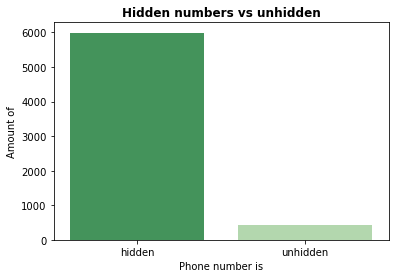

In [9]:
hidden = []
unhidden = []
str_ph = "'phone': None"

#Main operations
for i in range(len(df_meta)) :
    if str_ph in str(df_meta.loc[i]["users"]) : 
        if df_meta.loc[i]["users"] not in hidden : 
            hidden.append(df_meta.loc[i]["users"])
    if str_ph not in str(df_meta.loc[i]["users"]) :
        if df_meta.loc[i]["users"] not in unhidden :
            unhidden.append(df_meta.loc[i]["users"])

# Visuals
x = ["hidden", "unhidden"]
y = [len(hidden), len(unhidden)]
sns.barplot(x, y, palette = "Greens_r")
plt.title('Hidden numbers vs unhidden', fontsize=12, fontweight='bold')
plt.xlabel('Phone number is')
plt.ylabel('Amount of') 
plt.show()

#### №9. Amount of each message types I sent?

In [33]:
#Main operations
d = df.loc[(df["from_id"] == "PeerUser(user_id=332402450)")]
d1 = d.groupby(["type"])["type"].count()
display(d1)

type
photo        6559
sticker       802
text       149566
video         491
voice        2069
Name: type, dtype: int64

#### №10. Amount of each message types I received?

In [34]:
#Main operations
d = df.loc[(df["to_id"] == "332402450")]
d1 = d.groupby(["type"])["type"].count()
display(d1)

type
photo       3856
sticker     1244
text       67129
video        420
voice       2540
Name: type, dtype: int64

#### №11. Which things I forwarded most? (posts, media files?)

In [41]:
#Main operations
d = df.loc[(df["from_id"] == "PeerUser(user_id=332402450)")].dropna(axis = 0,subset=['fwd_from'])
d1 = d.groupby(["type"])["type"].count()
display(d1)

type
photo      2059
sticker      11
text       1682
video       302
voice        12
Name: type, dtype: int64

#### №12. The longest video I've sent and the longest audio I've received?

In [7]:
gk = df.loc[(df["type"] == "video") & (df["from_id"] == "PeerUser(user_id=332402450)")]
display(gk[gk["duration"] == gk["duration"].max()])

gk1 = df.loc[(df["type"] == "voice") & (df["to_id"] == "332402450")]
display(gk1[gk1["duration"] == gk1["duration"].max()])

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
945745,238038,2021-12-13 10:46:37+00:00,PeerUser(user_id=332402450),898648163,"MessageFwdHeader(date=datetime.datetime(2021, ...",#урок1 Теорія,video,5158.0,898648163


,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
763591,178251,2021-07-23 11:37:35+00:00,NaN,332402450,"MessageFwdHeader(date=datetime.datetime(2021, ...",МЫШЛЕНИЕ МИЛЛИОНЕРА от АЛЕКСЕЯ ШЕВЦОВА\n\n#под...,voice,1041.0,332402450


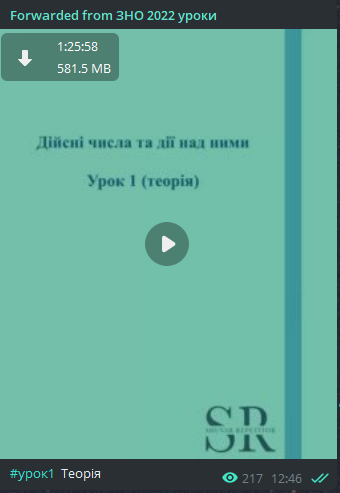 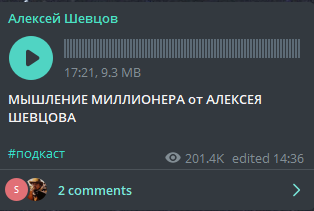

#### №13. The words I use the most?

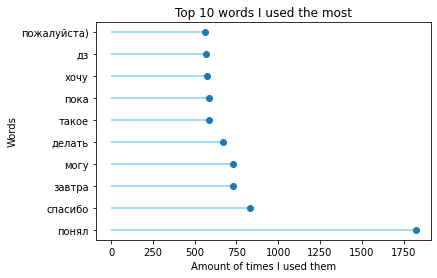

In [7]:
from collections import Counter
text = df[(df["type"]=="text") & (df["from_id"] == "PeerUser(user_id=332402450)")].dropna(how='all')
comm_word = text[['message','dialog_id']]

#Main operations
a = comm_word.applymap(str)
d = Counter(" ".join(a["message"]).lower().split())
res = pd.DataFrame.from_dict(d, orient='index').reset_index()
res.columns.values[1] = 'count'
res = res.sort_values(by='count',ascending=False)

list_with_w = []

for i in range(len(res)):
    if res.loc[i]['index'] not in stopwords.words('russian') :
        if res.loc[i]['index'] not in stopwords.words('ukrainian') :
            if res.loc[i]['index'] not in stopwords.words('symbols') :
                if res.loc[i]['index'] not in stopwords.words('english') :
                    list_with_w.append(res.loc[i])

result = pd.DataFrame(list_with_w)

#Visuals
# Reorder it based on the values
result = result.sort_values(by='count',ascending=False)
result = result.head(10)
res=range(1,len(result.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=res, xmin=0, xmax=result['count'], color='skyblue')
plt.plot(result['count'], res, "o")
 
# Add titles and axis names
plt.yticks(res, result['index'])
plt.title('Top 10 words I used the most', loc='center')
plt.xlabel('Amount of times I used them')
plt.ylabel('Words')

# Show the plot
plt.show()

#### №14. The words people who talk with me use the most?

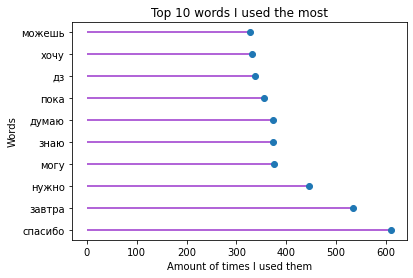

In [132]:
from collections import Counter
text = df[(df["type"]=="text") & (df["to_id"] == "332402450")].dropna(how='all')
comm_word = text[['message','dialog_id']]

#Main operations
a = comm_word.applymap(str) # messages I've sent
d = Counter(" ".join(a["message"]).lower().split()) # all the words counted
res = pd.DataFrame.from_dict(d, orient='index').reset_index()
res.columns.values[1] = 'count'
res = res.sort_values(by='count',ascending=False)

list_with_w = []

for i in range(len(res)):
    if res.loc[i]['index'] not in stopwords.words('russian') :
        if res.loc[i]['index'] not in stopwords.words('ukrainian') :
            if res.loc[i]['index'] not in stopwords.words('symbols') :
                if res.loc[i]['index'] not in stopwords.words('english') :
                    list_with_w.append(res.loc[i])

result = pd.DataFrame(list_with_w)

# Reorder it based on the values
result = result.sort_values(by='count',ascending=False)
result = result.head(10)
res=range(1,len(result.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=res, xmin=0, xmax=result['count'], color='darkorchid')
plt.plot(result['count'], res, "o")
 
# Add titles and axis names
plt.yticks(res, result['index'])
plt.title('Top 10 words I used the most', loc='center')
plt.xlabel('Amount of times I used them')
plt.ylabel('Words')

# Show the plot
plt.show()

#### №15. Types of messeges I used (with '?', '!' ot with ' '/'.')?

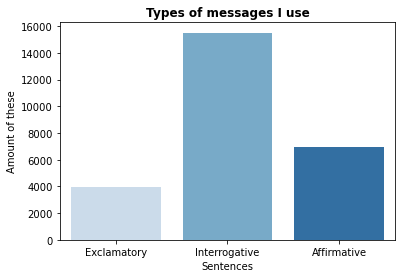

In [8]:
excl = [] #exclamation mark !
ques = [] #question mark ?
dot =  [] #dot .

#Main operations
for i in range(len(df)) :
    if df.loc[i]["from_id"] == "PeerUser(user_id=332402450)" :
        string = str(df.loc[i]["message"])
        if "!" in str(df.loc[i]["message"]) :
            excl.append(df.loc[i]["message"])
        if "?" in str(df.loc[i]["message"]) :
            ques.append(df.loc[i]["message"])
        if "." in str(df.loc[i]["message"]) or string[-1] == '':
            dot.append(df.loc[i]["message"])

# Visuals
x = ["Exclamatory", "Interrogative", "Affirmative"]
y = [len(excl), len(ques), len(dot)]
sns.barplot(x, y, palette = "Blues")
plt.title('Types of messages I use', fontsize=12, fontweight='bold')
plt.xlabel('Sentences')
plt.ylabel('Amount of these') 
plt.show()

#### №16. Types of messeges I received (with '?', '!' ot with ' '/'.')?

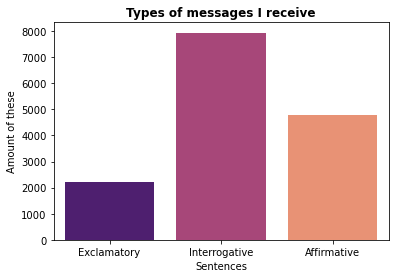

In [246]:
excl = [] #exclamation mark !
ques = [] #question mark ?
dot =  [] #dot .

#Main operations
for i in range(len(df)) :
    if df.loc[i]["to_id"] == "332402450" :
        string = str(df.loc[i]["message"])
        if "!" in str(df.loc[i]["message"]) :
            excl.append(df.loc[i]["message"])
        if "?" in str(df.loc[i]["message"]) :
            ques.append(df.loc[i]["message"])
        if "." in str(df.loc[i]["message"]) or string[-1] == '':
            dot.append(df.loc[i]["message"]) 

# Visuals
x = ["Exclamatory", "Interrogative", "Affirmative"]
y = [len(excl), len(ques), len(dot)]
sns.barplot(x, y, palette = "magma")
plt.title('Types of messages I receive', fontsize=12, fontweight='bold')
plt.xlabel('Sentences')
plt.ylabel('Amount of these') 
plt.show()

#### №17. In which season I sent the biggest amount of messages?

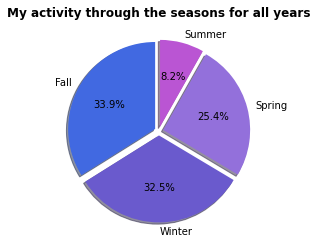

In [7]:
messages = df.loc[df["from_id"] == "PeerUser(user_id=332402450)"]
messages = messages["date"]
date = pd.DataFrame(messages) 

df_fall = []
df_winter = []
df_spring = []
df_summer = []
      
#Main operations    
for i in range(len(date)):
    time_str = str(date.iloc[i, 0]) 
    time_str = time_str.replace("+00:00","")
    d = dt.strptime(time_str, "%Y-%m-%d %H:%M:%S")
    y = str(d.year)
    
    spring = dt.strptime(y + "-05-31 23:59:59", "%Y-%m-%d %H:%M:%S")
    summer = dt.strptime(y + "-08-31 23:59:59", "%Y-%m-%d %H:%M:%S")
    fall = dt.strptime(y + "-11-30 23:59:59", "%Y-%m-%d %H:%M:%S")
    winter = dt.strptime(y + "-02-28 23:59:59", "%Y-%m-%d %H:%M:%S")

    if ("2016-02-29" in str(d)) | ("2020-02-29" in str(d)):
        df_winter.append(date.iloc[i, 0])
    if (d > winter) & (d <= spring):
        df_spring.append(date.iloc[i, 0])
    if (d > spring) & (d <= summer):
        df_summer.append(date.iloc[i, 0])
    if (d > summer) & (d <= fall):
        df_fall.append(date.iloc[i, 0])
    if (d > fall) & (d <= winter):
        df_winter.append(date.iloc[i, 0])

# Visuals
winter = len(date) - (len(df_fall) + len(df_winter) + len(df_spring) + len(df_summer))
slices = [len(df_fall), winter, len(df_spring), len(df_summer)]
activities = ["Fall", "Winter", "Spring", "Summer"]
cols = ['royalblue', 'slateblue', 'mediumpurple', 'mediumorchid']
plt.pie(slices,
labels=activities,
colors=cols,
startangle=90,
shadow= True,
explode=(0.05,0.05,0.05,0.05),
autopct='%1.1f%%')
plt.title('My activity through the seasons for all years', fontsize=12, fontweight='bold')
plt.show()

#### №18. In which season I received the biggest amount of messages?

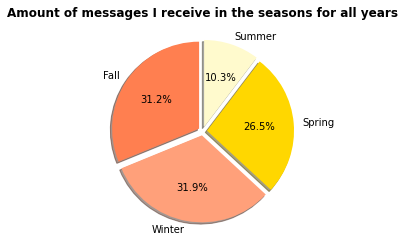

In [6]:
messages = df.loc[df["to_id"] == "332402450"]
messages = messages["date"]
date = pd.DataFrame(messages) 

df_fall = []
df_winter = []
df_spring = []
df_summer = []

#Main operations
for i in range(len(date)):
    time_str = str(date.iloc[i, 0]) 
    time_str = time_str.replace("+00:00","")
    d = dt.strptime(time_str, "%Y-%m-%d %H:%M:%S")
    y = str(d.year)
    
    spring = dt.strptime(y + "-05-31 23:59:59", "%Y-%m-%d %H:%M:%S")
    summer = dt.strptime(y + "-08-31 23:59:59", "%Y-%m-%d %H:%M:%S")
    fall = dt.strptime(y + "-11-30 23:59:59", "%Y-%m-%d %H:%M:%S")
    winter = dt.strptime(y + "-02-28 23:59:59", "%Y-%m-%d %H:%M:%S")

    if ("2016-02-29" in str(d)) | ("2020-02-29" in str(d)):
        df_winter.append(date.iloc[i, 0])
    if (d > winter) & (d <= spring):
        df_spring.append(date.iloc[i, 0])
    if (d > spring) & (d <= summer):
        df_summer.append(date.iloc[i, 0])
    if (d > summer) & (d <= fall):
        df_fall.append(date.iloc[i, 0])
    if (d > fall) & (d <= winter):
        df_winter.append(date.iloc[i, 0])

# Visuals
winter = len(date) - (len(df_fall) + len(df_winter) + len(df_spring) + len(df_summer))
slices = [len(df_fall), winter, len(df_spring), len(df_summer)]
activities = ["Fall", "Winter", "Spring", "Summer"]
cols = ['coral', 'lightsalmon', 'gold', 'lemonchiffon']
plt.pie(slices,
labels=activities,
colors=cols,
startangle=90,
shadow= True,
explode=(0.05,0.05,0.05,0.05),
autopct='%1.1f%%')
plt.title('Amount of messages I receive in the seasons for all years', fontsize=12, fontweight='bold')
plt.show()

#### №19. In which time of the day I sent messages the most?

C:\Users\User\AppData\Local\Temp/ipykernel_13092/1465731309.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



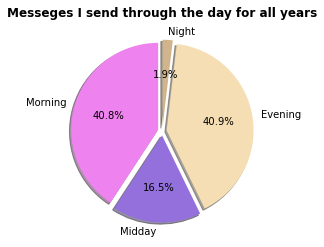

In [31]:
messages = df.loc[df["from_id"] == "PeerUser(user_id=332402450)"]
messages["date"] = pd.to_datetime(messages["date"]).dt.time
mes_df = messages.groupby('date').agg(messages = pd.NamedAgg(column='id', aggfunc = pd.Series.count),)
new = mes_df.groupby('date')
date = pd.DataFrame(new)   

morning = dt.strptime("13:00:00", "%H:%M:%S")
midday = dt.strptime("16:00:00", "%H:%M:%S")
evening = dt.strptime("23:59:59", "%H:%M:%S")
night = dt.strptime("04:00:00", "%H:%M:%S")
df_morning = []
df_midday = []
df_evening = []
df_night = []

#Main operations
for i in range(len(date)):
    time_str = str(date.iloc[i, 0]) 
    time_str = time_str.replace("+00:00","")
    d = dt.strptime(time_str, "%H:%M:%S")
    
    if (d < night):
        df_night.append(date.iloc[i, 0])
    
    if (d > night) & (d <= morning):
        df_morning.append(date.iloc[i, 0])
    if (d > morning) & (d <= midday):
        df_midday.append(date.iloc[i, 0])
    if (d > midday) & (d <= evening):
        df_evening.append(date.iloc[i, 0])

# Visuals
slices = [len(df_morning), len(df_midday), len(df_evening), len(df_night)]
activities = ["Morning", "Midday", "Evening", "Night"]
cols = ['violet','mediumpurple','wheat','tan']
plt.pie(slices,
labels=activities,
colors=cols,
startangle=90,
shadow= True,
explode=(0.05,0.05,0.05,0.05),
autopct='%1.1f%%')
plt.title('Messeges I send through the day for all years', fontsize=12, fontweight='bold')
plt.show()

#### №20. In which time of the day I received messages the most?

C:\Users\User\AppData\Local\Temp/ipykernel_8252/994205985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages["date"] = pd.to_datetime(messages["date"]).dt.time


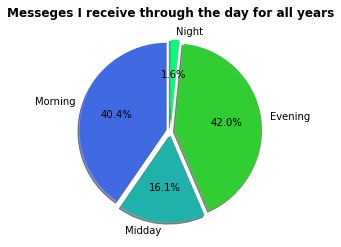

In [24]:
messages = df.loc[df["to_id"] == "332402450"]
messages["date"] = pd.to_datetime(messages["date"]).dt.time
mes_df = messages.groupby('date').agg(messages = pd.NamedAgg(column='id', aggfunc = pd.Series.count),)
new = mes_df.groupby('date')
date = pd.DataFrame(new)   

morning = dt.strptime("13:00:00", "%H:%M:%S")
midday = dt.strptime("16:00:00", "%H:%M:%S")
evening = dt.strptime("23:59:59", "%H:%M:%S")
night = dt.strptime("04:00:00", "%H:%M:%S")
df_morning = []
df_midday = []
df_evening = []
df_night = []

#Main operations
for i in range(len(date)):
    time_str = str(date.iloc[i, 0]) 
    time_str = time_str.replace("+00:00","")
    d = dt.strptime(time_str, "%H:%M:%S")
    if (d < night):
        df_night.append(date.iloc[i, 0])
    if (d > night) & (d <= morning):
        df_morning.append(date.iloc[i, 0])
    if (d > morning) & (d <= midday):
        df_midday.append(date.iloc[i, 0])
    if (d > midday) & (d <= evening):
        df_evening.append(date.iloc[i, 0])

# Visuals
slices = [len(df_morning), len(df_midday), len(df_evening), len(df_night)]
activities = ["Morning", "Midday", "Evening", "Night"]
cols = ['royalblue','lightseagreen','limegreen','springgreen']
plt.pie(slices,
labels=activities,
colors=cols,
startangle=90,
shadow= True,
explode=(0.05,0.05,0.05,0.05),
autopct='%1.1f%%')
plt.title('Messeges I receive through the day for all years', fontsize=12, fontweight='bold')
plt.show()

#### №21. How has changed my activness in Telegram before the COVID-19 and after? (11 march 2020 when WHO declared COVID-19 pandemic, so it will be from 2019-03-11 and up to the start vs 2020-03-11 and up to the 2021-03-11) 

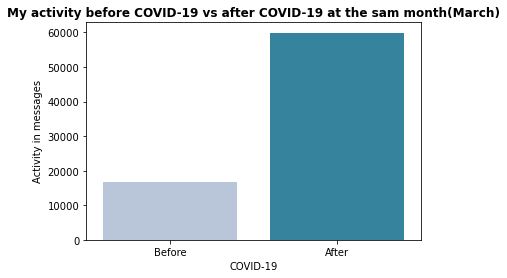

In [139]:
before = dt.strptime("2019-03-11 23:59:59", "%Y-%m-%d %H:%M:%S")
start = dt.strptime("2020-03-11 23:59:59", "%Y-%m-%d %H:%M:%S")
after = dt.strptime("2021-03-11 23:59:59", "%Y-%m-%d %H:%M:%S")
df_before = []
df_after = []

messages = pd.DataFrame(df.loc[(df["from_id"] == "PeerUser(user_id=332402450)")])
date = pd.DataFrame(messages["date"])   

#Main operations
for i in range(len(date)):
    time_str = date.iloc[i, 0] 
    time_str = time_str.replace("+00:00","")
    d = dt.strptime(time_str, "%Y-%m-%d %H:%M:%S")
    if (d > before) & (d < start):
        df_before.append(time_str)
    if (d >= start) & (d < after):
        df_after.append(time_str)

# Visuals
x = ["Before", "After"]
y = [len(df_before), len(df_after)]
sns.barplot(x, y, palette = "PuBuGn")
plt.title('My activity before COVID-19 vs after COVID-19 at the sam month(March)', fontsize=12, fontweight='bold')
plt.xlabel('COVID-19')
plt.ylabel('Activity in messages') 
plt.show()

#### Here is the summary I've mentioned in the start of this research.
#### I've done the analysis of my communication. It was very interesting as I could draw a portrait of myself. The only thing I haven't done is mergind tables as I haven't  found the way to do this. As, you have seen I am more active in private dialogs and I have more of them (67% vs 33%) and I don't have informational groups (where I couldn't chat, I think that I really have them, but I'm not sure that they are in the data downloaded as there aren't them so many). 
#### You've seen stickers me and my friends use the most and all the stickers I've ever used. It's quite interesting data as emoji are very popular and each of us uses them daily to show our emotions and what we feel. Also, I found the longest video I've sent and the longest audio I've received. It was interesting for me to find this particular information.
#### The words I use the most are: "me", "and", "no", while my interlocutors use "no", "me", "in", as you see nearly the same. My friends and I send each other a lot of text, then photos and voice messages. Moreover, I forward the same stuff. I usually ask something or just tell some stuff and the same situation with my interlocutors (it's about types of sentences "!", "?", "."). 
#### The biggest part of all the users in telegram has their phones hidden, while only some of them have unhidden phones (nearly 6000 vs 500). My communication is the most active in fall and winter (you can see it by amount of messages my friends and I sent each other). And the same situation is with the time when we speak: morning and evening are the most "popular" times for us to communicate. 
#### Also, I've discovered that after COVID-19 started I've used to sitting a lot in Telegram (nearly 17000 messages before COVID vs 60000 after). And on my birthday I have nearly 1/35 of all the messages people send me on May. 